In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TCIdoang_Tabanan.csv to TCIdoang_Tabanan.csv


In [ ]:
import tensorflow as tf 
import numpy as np
import pandas as pd

In [ ]:
TCI_df = pd.read_csv('TCIdoang_Tabanan.csv')

In [ ]:
TCI_df.keys()

Index(['Unnamed: 0', 'Date', 'TCI'], dtype='object')

In [ ]:
del TCI_df['Unnamed: 0']
del TCI_df['Date']

In [ ]:
Date = pd.Series(pd.date_range("2021-01-01", periods=59, freq="D"))

In [ ]:
TCI = TCI_df['TCI']
Day = Date.index.values

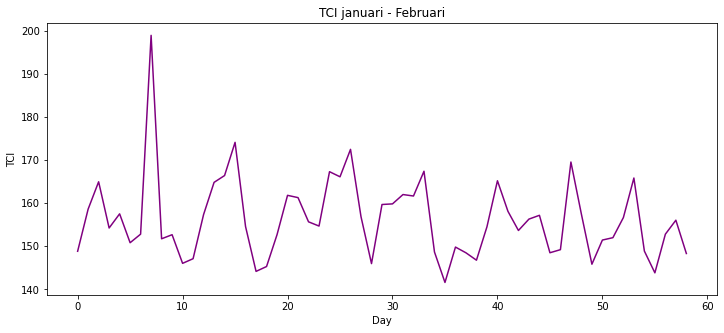

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))

# Add x-axis and y-axis
ax.plot(Date.index.values,
       TCI,
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Day",
       ylabel="TCI",
       title="TCI januari - Februari")

plt.show()

In [ ]:
split_time = 50
Day_train = Day[:split_time]
TCI_train = TCI[:split_time]
Day_valid = Day[split_time:]
TCI_valid = TCI[split_time:]

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=[1]))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
model.fit(Day_train,TCI_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 10ms/step - loss: 25187.6895
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 23711.4941
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 22689.5605
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 21734.8125
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 20625.5508
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 19426.9238
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 18009.0371
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 16391.8672
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 14664.6826
Epoch 10/500
2/2 [==============================] - 0s 14ms/step - loss: 12880.3779
Epoch 11/500
2/2 [==============================] - 0s 11ms/step - loss: 11089.1475
Epoch 12/500
2/2 [==============================] - 0s 4ms/step - loss: 9407.6250
Epoch 13/50

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 82,817
Trainable params: 82,817
Non-trainable params: 0
_________________________________________________________________


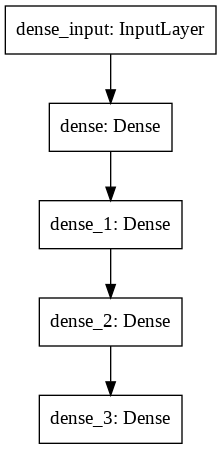

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
TCI_tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmps07fsgfz/assets


INFO:tensorflow:Assets written to: /tmp/tmps07fsgfz/assets


In [ ]:
with tf.io.gfile.GFile('TCI_model.tflite', 'wb') as f:
  f.write(TCI_tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path="TCI_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_shape = input_details[0]['shape']

In [ ]:
input_data = np.array(Day_valid[0:1], dtype=np.float32)
input_data = np.expand_dims(input_data, axis=0)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
print(input_data)

[[50.]]


In [ ]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[152.55467]]
